# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

## (1) 필요한 모듈 import하기

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [ ]:
digits = load_digits()

## (3) 데이터 이해하기

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [ ]:
digits_data[0].shape

(64,)

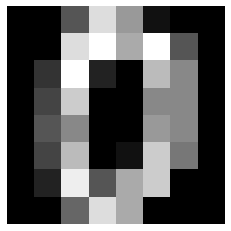

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

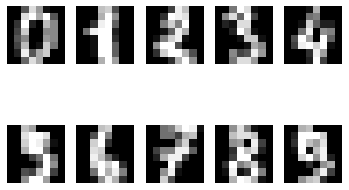

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

In [ ]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

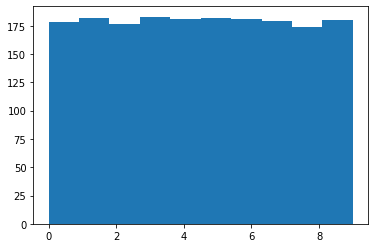

In [ ]:
plt.hist(digits_label)

라벨의 분포가 고르다 -> imbalance 문제가 없겠구나

## (4) train, test 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=32) 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Decision tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) 
y_pred_dt = decision_tree.predict(X_test)

# Random Forest
randomforest = RandomForestClassifier(random_state=32)
randomforest.fit(X_train, y_train) 
y_pred_rf = randomforest.predict(X_test) 

# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred_svm = svm_model.predict(X_test) 

# SGDClassifer
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train) 
y_pred_sgd = sgd_model.predict(X_test) 

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train) 
y_pred_lr = logistic_model.predict(X_test) 


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Desicion Tree')
print(classification_report(y_test, y_pred_dt))
print('----------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('----------------------------')
print('SVM')
print(classification_report(y_test, y_pred_svm))
print('----------------------------')
print('Stochastic Gradient Descent')
print(classification_report(y_test, y_pred_sgd))
print('----------------------------')
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))


Desicion Tree
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.75      0.83      0.79        36
           2       0.75      0.84      0.79        32
           3       0.92      0.86      0.89        56
           4       0.85      0.90      0.88        31
           5       0.92      0.97      0.95        36
           6       0.97      0.94      0.96        34
           7       0.94      0.88      0.91        34
           8       0.88      0.78      0.82        27
           9       0.79      0.83      0.81        36

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.88       360

----------------------------
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        36
           2       0.

대체적으로 결과가 잘 나왔다. 글씨를 검출할 때에는 정확도가 더 중요하다고 생각하기 때문에 가장 성능이 안 좋은 모델은 Decision Tree이고 가장 성능이 좋은 모델은 SVM 이다.

# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

## (1) 필요한 모듈 import하기

In [15]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## (2) 데이터 준비

In [3]:
wine = load_wine()

## (3) 데이터 이해하기

In [5]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
wine_data = wine.data
wine_data.shape

(178, 13)

In [19]:
wine_label = wine.target
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df['label'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [29]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

결측지는 없다.

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

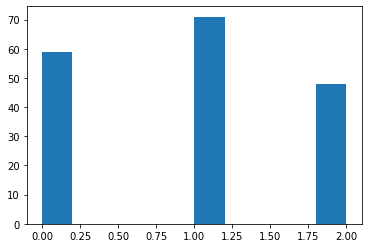

In [17]:
plt.hist(wine_df['label'])

라벨의 분포가 고른 편이다다

## (4) train, test 분리

In [20]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=32) 


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
# Decision tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) 
y_pred_dt = decision_tree.predict(X_test)

# Random Forest
randomforest = RandomForestClassifier(random_state=32)
randomforest.fit(X_train, y_train) 
y_pred_rf = randomforest.predict(X_test) 

# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred_svm = svm_model.predict(X_test) 

# SGDClassifer
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train) 
y_pred_sgd = sgd_model.predict(X_test) 

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train) 
y_pred_lr = logistic_model.predict(X_test) 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print('Desicion Tree')
print(classification_report(y_test, y_pred_dt))
print('----------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('----------------------------')
print('SVM')
print(classification_report(y_test, y_pred_svm))
print('----------------------------')
print('Stochastic Gradient Descent')
print(classification_report(y_test, y_pred_sgd))
print('----------------------------')
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))


Desicion Tree
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36

----------------------------
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

----------------------------
SVM
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.41      0.90      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


와인분류 역시 정확도가 중요하다고 생각한다. 글씨검출에서 가장 성능이 좋았던 SVM이 가장 성능이 좋지 않은데 기본 SVM을 써서 그렇다고 생각된다. 가장 성능이 좋았던 것은 RandomForest 모델이다.

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

## (1) 필요한 모듈 import하기

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## (2) 데이터 준비

In [25]:
bc = load_breast_cancer()

## (3) 데이터 이해하기

In [26]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
bc_data = bc.data
bc_data.shape

(569, 30)

In [31]:
bc_label = bc.target
bc_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
bc_df = pd.DataFrame(data=bc_data, columns=bc.feature_names)
bc_df['label'] = bc.target
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [33]:
bc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

결측치 없음

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

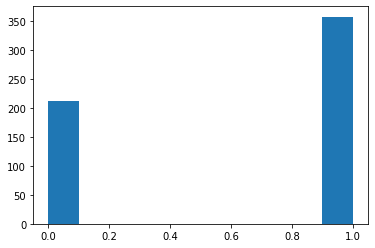

In [34]:
plt.hist(bc_df['label'])

라벨의 분포 1인경우가 좀더 많다

## (4) train, test 분리

In [35]:
X_train, X_test, y_train, y_test = train_test_split(bc_data, 
                                                    bc_label, 
                                                    test_size=0.2, 
                                                    random_state=32) 


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
# Decision tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) 
y_pred_dt = decision_tree.predict(X_test)

# Random Forest
randomforest = RandomForestClassifier(random_state=32)
randomforest.fit(X_train, y_train) 
y_pred_rf = randomforest.predict(X_test) 

# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred_svm = svm_model.predict(X_test) 

# SGDClassifer
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train) 
y_pred_sgd = sgd_model.predict(X_test) 

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train) 
y_pred_lr = logistic_model.predict(X_test) 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print('Desicion Tree')
print(classification_report(y_test, y_pred_dt))
print('----------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('----------------------------')
print('SVM')
print(classification_report(y_test, y_pred_svm))
print('----------------------------')
print('Stochastic Gradient Descent')
print(classification_report(y_test, y_pred_sgd))
print('----------------------------')
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))


Desicion Tree
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.90      0.90      0.90        70

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114

----------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.96      0.94      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

----------------------------
SVM
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.85      0.96      0.90        70

    accuracy                           0.87       114
   macro avg       0.88      0.84     

암의 여부를 예측할때에는 실제 양성여부를 놓치면 안되기 때문에 recall을 봐야 한다. recall이 가장 좋은 모델은 0.94로 Random Forest 모델이다.